In [1]:
import sys
assert sys.version_info >= (3, 7)

In [2]:
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [4]:
import numpy as np
import pandas as pd

In [5]:
# use sklearn to load the California housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
# load into pandas dataframe
df_feature = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df_target = pd.DataFrame(data=housing.target, columns=housing.target_names)
df_housing = pd.concat([df_feature, df_target], axis=1)

In [6]:
# take a look at the data
df_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
df_housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


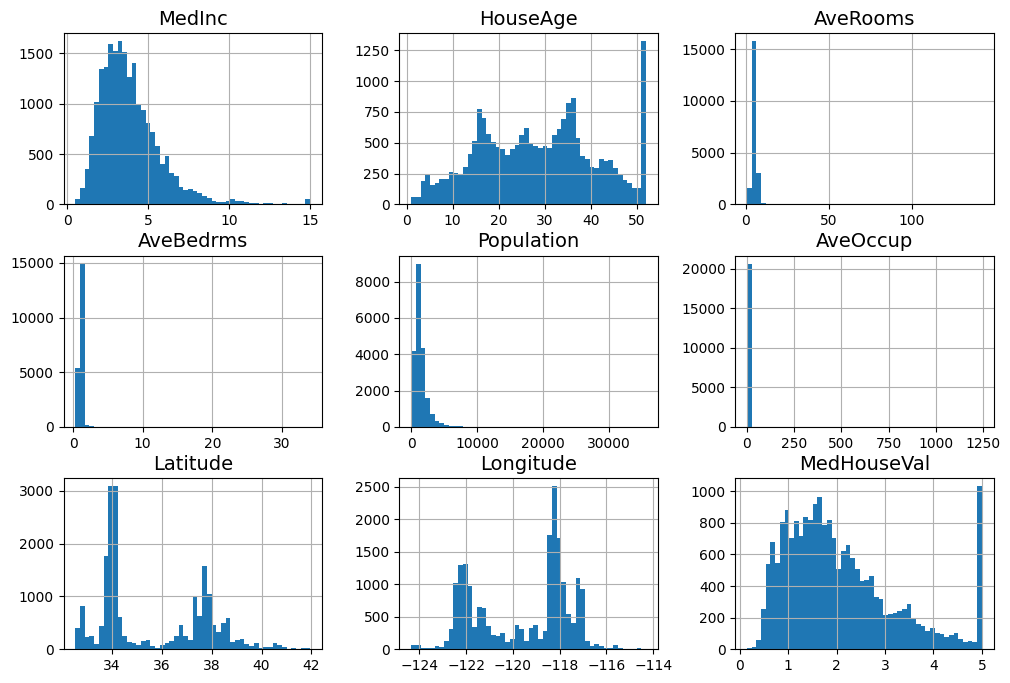

In [8]:
df_housing.hist(bins=50, figsize=(12, 8))
plt.show()

In [9]:
# use sklearn to split the California housing dataset
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=4782)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=4692)

In [38]:
# first try single decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
tree_reg = DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, random_state=8793)
tree_reg.fit(X_train, y_train)
y_output = tree_reg.predict(X_valid)
tree_rmse = mean_squared_error(y_valid, y_output, squared=False)
print('RMSE for tree on validation dataset:',tree_rmse)
# can look at feature importance
print('features in tree')
for score, name in zip(tree_reg.feature_importances_, housing.feature_names):
    print(round(score, 2), name)

RMSE for tree on validation dataset: 0.6251221388662891
features in tree
0.62 MedInc
0.04 HouseAge
0.03 AveRooms
0.01 AveBedrms
0.01 Population
0.14 AveOccup
0.07 Latitude
0.08 Longitude


In [39]:
# can look at subset of features in training data
X_train_red = np.vstack([X_train[:,0],X_train[:,5],X_train[:,6],X_train[:,7]]).T
X_valid_red = np.vstack([X_valid[:,0],X_valid[:,5],X_valid[:,6],X_valid[:,7]]).T
red_feature_names = [housing.feature_names[0],housing.feature_names[5],housing.feature_names[6],housing.feature_names[7]]

In [44]:
# now try with best features
tree_reg_best = DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, random_state=8543)
tree_reg_best.fit(X_train_red, y_train)
y_output = tree_reg_best.predict(X_valid_red)
tree_rmse = mean_squared_error(y_valid, y_output, squared=False)
print("RMSE for tree on validation dataset: ", tree_rmse)
# can look at feature importance
print('features in tree')
for score, name in zip(tree_reg_best.feature_importances_, red_feature_names):
    print(round(score, 2), name)

RMSE for tree on validation dataset:  0.6085402462245361
features in tree
0.6 MedInc
0.14 AveOccup
0.13 Latitude
0.13 Longitude


In [45]:
# small tree with best features
tree_reg_small = DecisionTreeRegressor(max_depth=5, min_samples_leaf=1000, random_state=4443)
tree_reg_small.fit(X_train_red, y_train)
y_output = tree_reg_small.predict(X_valid_red)
tree_rmse = mean_squared_error(y_valid, y_output, squared=False)
print("RMSE for tree on validation dataset: ", tree_rmse)
# can look at feature importance
print('features in tree')
for score, name in zip(tree_reg_small.feature_importances_, red_feature_names):
    print(round(score, 2), name)

RMSE for tree on validation dataset:  0.8099988091752225
features in tree
0.85 MedInc
0.11 AveOccup
0.02 Latitude
0.02 Longitude


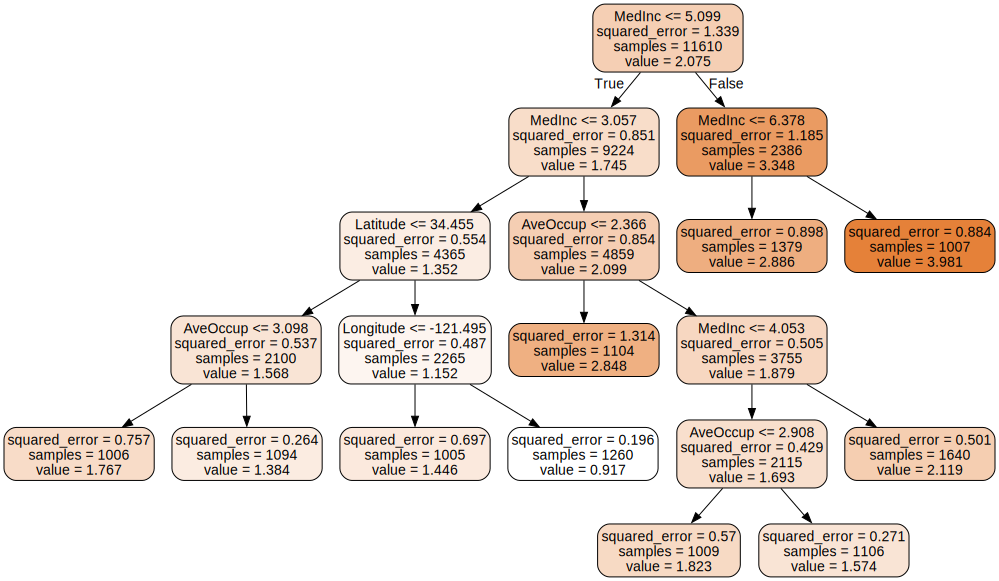

In [42]:
# print small tree graph
from sklearn.tree import export_graphviz
from graphviz import Source
export_graphviz(
        tree_reg_small,
        out_file="tree_reg.dot",
        feature_names=red_feature_names, class_names=housing.target_names,
        rounded=True,
        filled=True
)
Source.from_file("tree_reg.dot")

In [48]:
# now try a random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
forest_reg = RandomForestRegressor(n_estimators=500, max_samples=1.0, max_depth=25, min_samples_leaf=1, random_state=75593)
forest_reg.fit(X_train, y_train)
y_output = forest_reg.predict(X_valid)
forest_rmse = mean_squared_error(y_valid, y_output, squared=False)
print("RMSE for forest on validation dataset: ", forest_rmse)
# can look at feature importance
print('features in forest')
for score, name in zip(forest_reg.feature_importances_, housing.feature_names):
    print(round(score, 2), name)

RMSE for forest on validation dataset:  0.5130971321561497
features in forest
0.52 MedInc
0.06 HouseAge
0.05 AveRooms
0.03 AveBedrms
0.03 Population
0.14 AveOccup
0.08 Latitude
0.08 Longitude


In [49]:
# check performance of models on test set
y_output = tree_reg.predict(X_test)
tree_rmse = mean_squared_error(y_test, y_output, squared=False)
y_output = forest_reg.predict(X_test)
forest_rmse = mean_squared_error(y_test, y_output, squared=False)
# try out a few predictions
X_new = X_test[:3]
y_pred_tree = tree_reg.predict(X_new)
y_pred_forest = forest_reg.predict(X_new)
# print testing and predictions
print("RMSE for tree on test dataset: ",tree_rmse)
print("Targets for a few test points", y_test[:3])
print("Predictions for test points", y_pred_tree.T)
print()
print("RMSE for forest on test dataset: ",forest_rmse)
print("Targets for a few test points", y_test[:3])
print("Predictions for test points", y_pred_forest.T)

RMSE for tree on test dataset:  0.6121271110932942
Targets for a few test points [3.506 3.5   1.182]
Predictions for test points [3.72850167 3.17130846 1.75123077]

RMSE for forest on test dataset:  0.5012568461400538
Targets for a few test points [3.506 3.5   1.182]
Predictions for test points [3.57632402 3.32524226 1.41532482]
